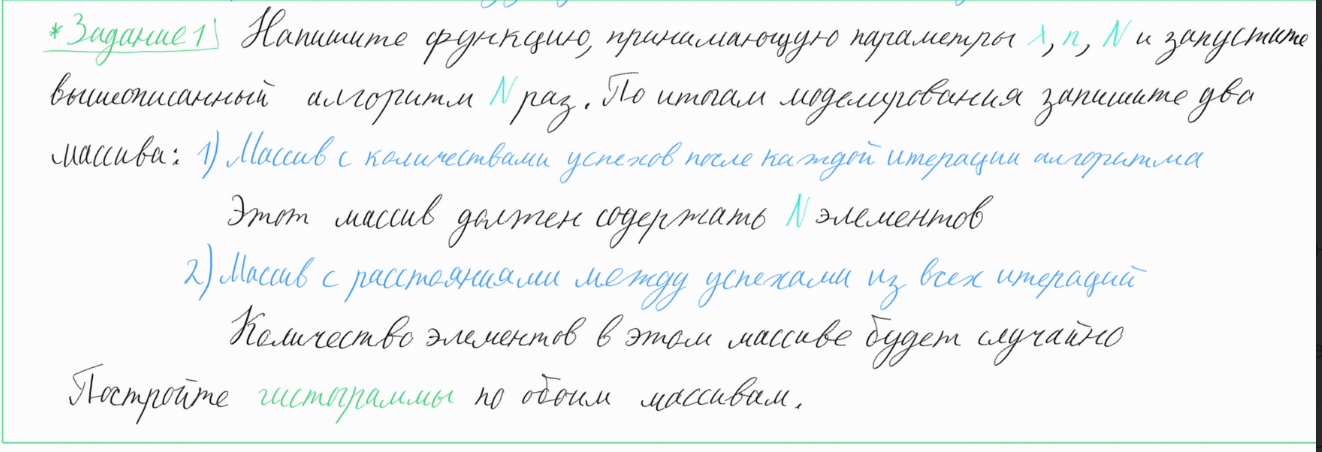

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib_inline

def bernoulli_to_poisson(Lambda, n, N):
    p = min(Lambda/n, 1)
    
    succeses = np.zeros(N, dtype= int)
    distances = []
    last_succes_idx = None
    rng = np.random.default_rng()

    for i in range(N):
        line = rng.binomial(n = 1, p = p, size= n)
        # print(line)
        for j in range(len(line)):
            if line[j] == 1 and last_succes_idx is not None:
                distances.append(j - last_succes_idx-1)
                last_succes_idx = j
            elif last_succes_idx is None and line[j] == 1:
                last_succes_idx = j

        last_succes_idx = None
        succeses[i] = line.sum()
    return succeses, np.array(distances)

lam = 5.0
n = 5000
N = 5

res, dist = bernoulli_to_poisson(lam, n, N)



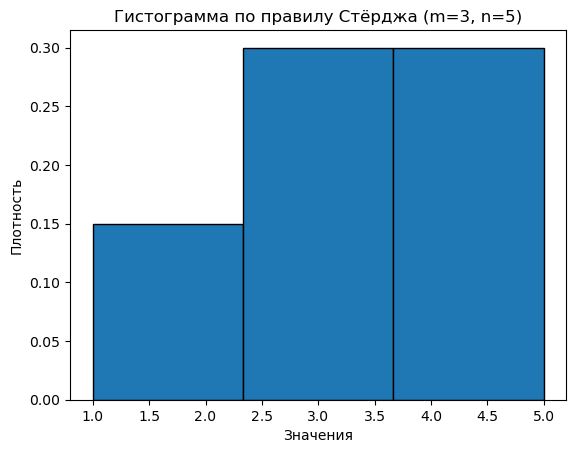

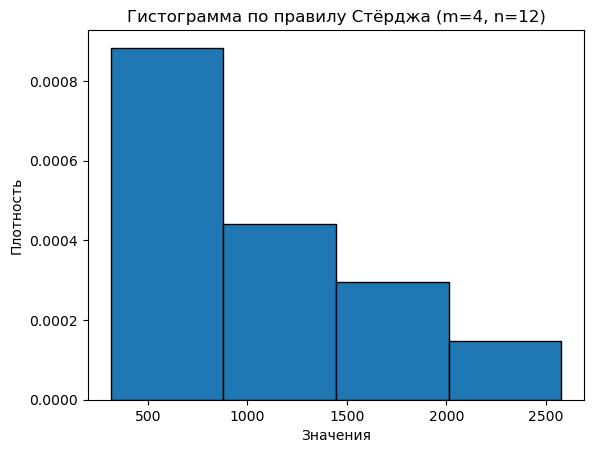

(array([ 596.125, 1162.375, 1728.625, 2294.875]),
 array([0.000883  , 0.0004415 , 0.00029433, 0.00014717]))

In [6]:
def histogram(data, show_plot=True):
    
    n = len(data)
    
    # Количество столбцов 
    m = 1 + np.floor(np.log2(n))
    
    # Разбиение [min, max] на m равных отрезков
    data_sorted = np.sort(data)
    
    min_val = data_sorted[0]
    max_val = data_sorted[-1]
    delta = (max_val - min_val) / m
    
    # Границы бинов
    bin_edges = np.linspace(min_val, max_val, int(m) + 1)
    
    # Частоты (количество k точек на различных равных отрезках)
    hist, _ = np.histogram(data, bins=bin_edges)
    
    # h = (k / n) / delta
    heights = (hist / n) / delta
    
    # Центры столбцов    bin_edges[:-1] - левые концы бинов, bin_edges[1:] - правые концы бинов
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    if show_plot:
        plt.bar(bin_centers, heights, width=delta, align='center', edgecolor='black')
        plt.xlabel('Значения')
        plt.ylabel('Плотность')
        plt.title(f'Гистограмма по правилу Стёрджа (m={int(m)}, n={n})')
        plt.show()
    
    return bin_centers, heights

histogram(res)
histogram(dist)


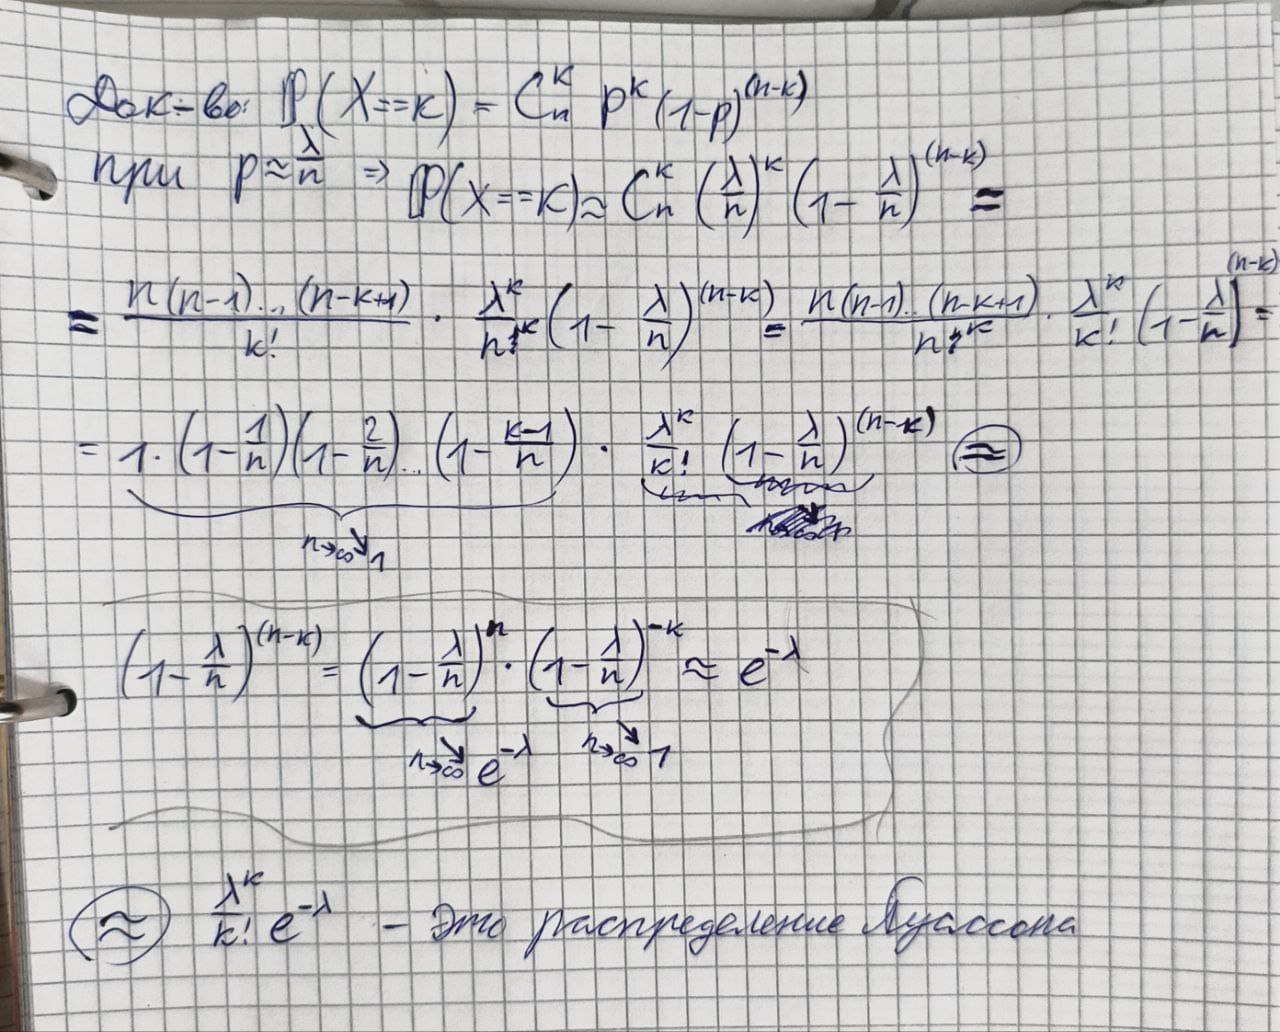

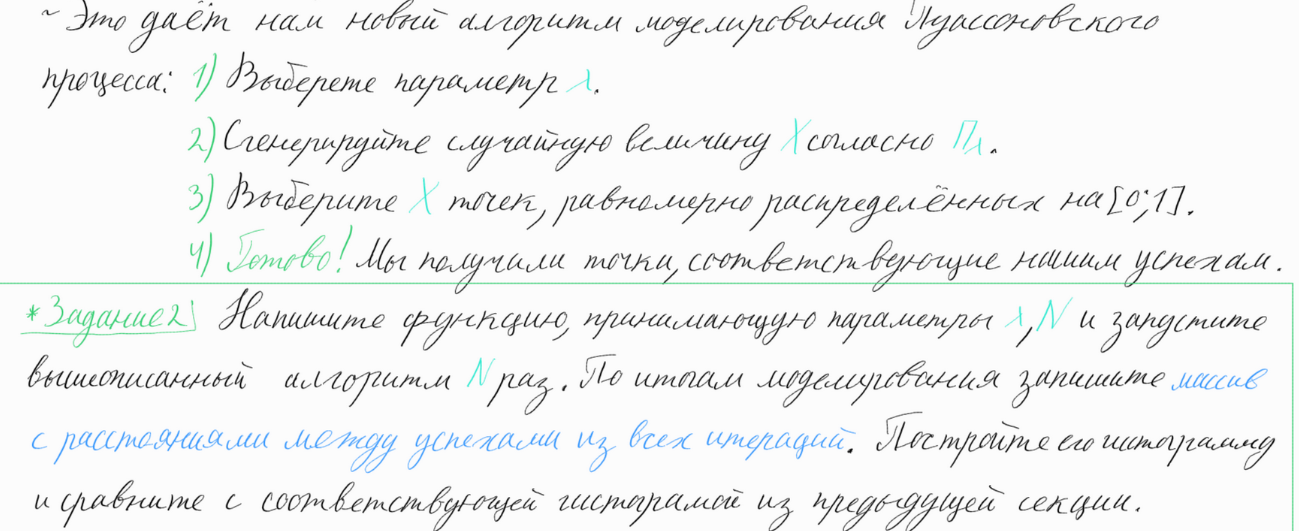

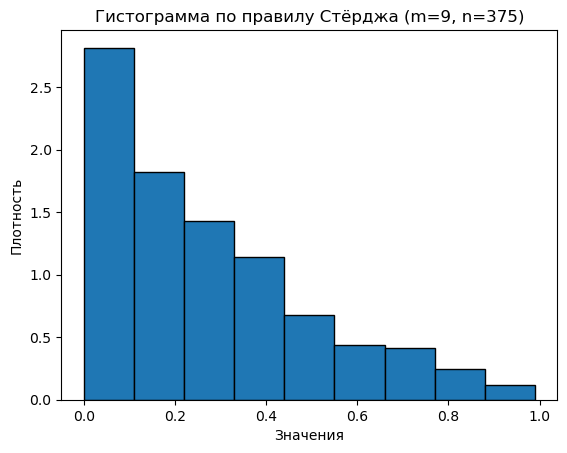

(array([0.05537613, 0.16529641, 0.2752167 , 0.38513699, 0.49505728,
        0.60497757, 0.71489785, 0.82481814, 0.93473843]),
 array([2.8141605 , 1.81950032, 1.43134026, 1.1402202 , 0.67928012,
        0.43668008, 0.41242007, 0.24260004, 0.12130002]))

In [3]:
def poisson_process(Lambda, N):
    
    distances = []
    for i in range(N):
        X = np.random.poisson(Lambda)

        if X > 1:
            pts = np.sort(np.random.uniform(0, 1, X))
            dist = np.diff(pts)
            distances.extend(dist)
        
    return np.array(distances)

pois_dists = poisson_process(1, 1000)
histogram(pois_dists, show_plot=True)

    

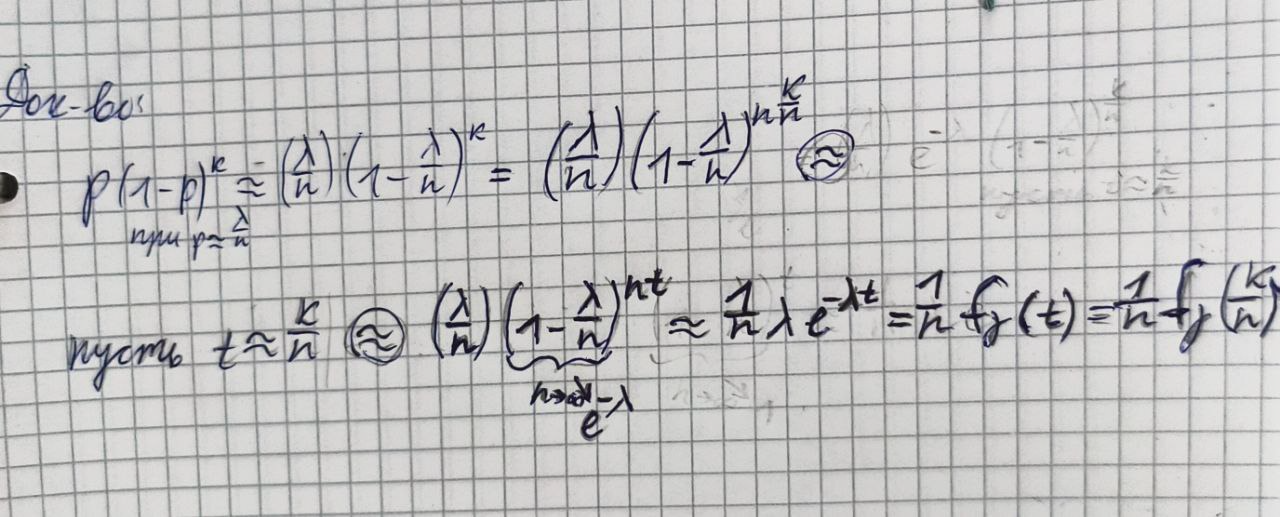

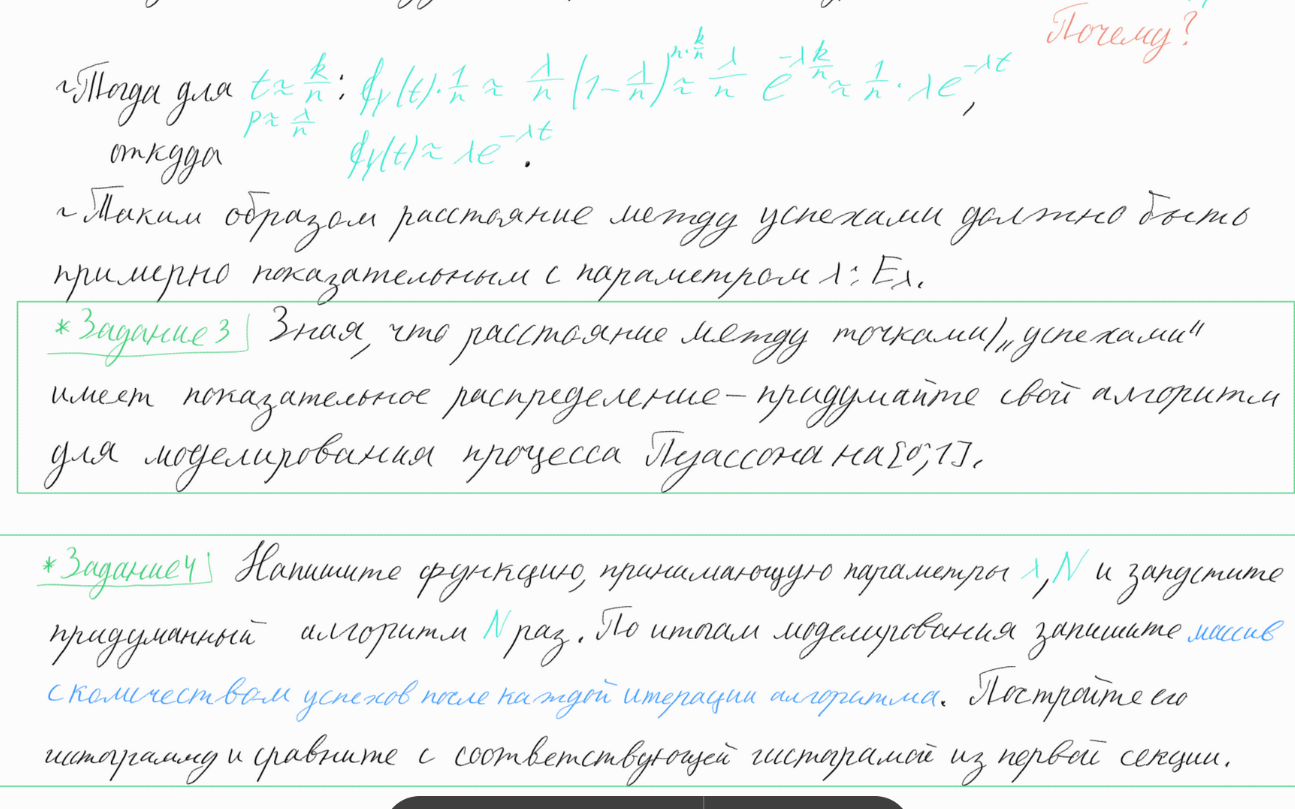

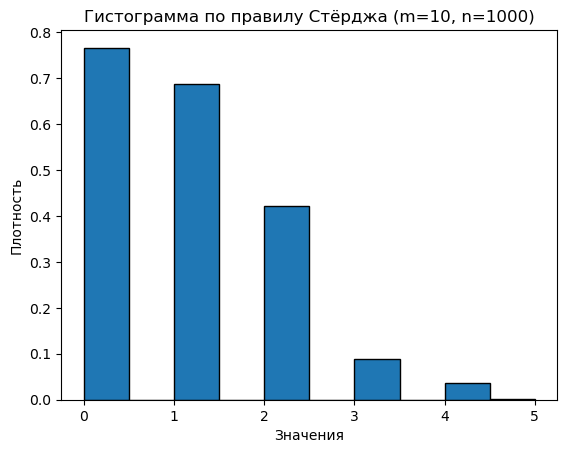

(array([0.25, 0.75, 1.25, 1.75, 2.25, 2.75, 3.25, 3.75, 4.25, 4.75]),
 array([0.766, 0.   , 0.686, 0.   , 0.422, 0.   , 0.088, 0.   , 0.036,
        0.002]))

In [ ]:
def poisson_exponential(Lambda, N):
    successes = np.empty(N, dtype= int)

    for i in range(N):

        pos = []
        T = 0.0
        while True:
            delta_T = np.random.exponential(scale= 1 / Lambda)#математическое ожидание экспоненциального распределения 
            T_next = T + delta_T

            if T_next > 1.0:
                break

            pos.append(T_next)
            T = T_next
        successes[i] = len(pos)
    return successes

exp_pois_counts = poisson_exponential(1, 1000)
histogram(exp_pois_counts, show_plot=True)